In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X=np.linspace(-5.0,5.0,100)
y=np.sqrt(10**2- X**2)
y=np.hstack([y,-y])
x=np.hstack([X,-X])

In [3]:
X1=np.linspace(-5.0,5.0,100)
y1=np.sqrt(5**2- X1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([X1,-X1])

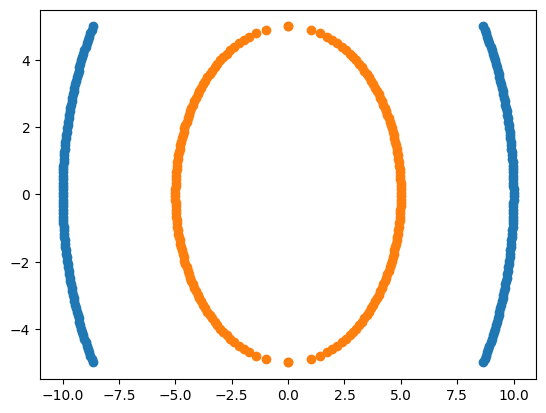

In [4]:

plt.scatter(y,x)
plt.scatter(y1,x1)

In [5]:
df1=pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0

In [6]:
df1.head(3)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0


In [7]:
df2=pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1

In [8]:
df2.head()

,X1,X2,Y
0,0.000000,-5.00000,1
1,0.999949,-4.89899,1
2,1.406908,-4.79798,1
3,1.714198,-4.69697,1
4,1.969049,-4.59596,1


In [9]:
df=df1.append(df2)

<ipython-input-9-a9d981095968>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [10]:

df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [11]:
X=df.iloc[:, :2]
y=df.Y

In [12]:

X

,X1,X2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596
...,...,...
195,-1.969049,-4.59596
196,-1.714198,-4.69697
197,-1.406908,-4.79798
198,-0.999949,-4.89899


In [13]:

y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [15]:
y_train.value_counts()

1    155
0    145
Name: Y, dtype: int64

In [17]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [18]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)

0.45

In [19]:

df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


<Axes: xlabel='X1', ylabel='X2'>

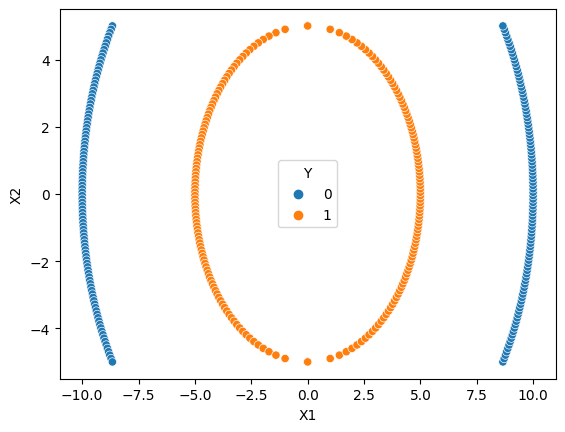

In [20]:

import seaborn as sns
sns.scatterplot(x=df['X1'], y = df['X2'],hue=df['Y'],data=df)

In [21]:
from sklearn.svm import SVC
model1=SVC(kernel='rbf')
model1.fit(X_train,y_train)

SVC()

In [22]:
from sklearn.metrics import accuracy_score
y_pred1=model1.predict(X_test)
accuracy_score(y_test,y_pred1)

1.0

In [23]:

from sklearn.svm import SVC
model2=SVC(kernel='poly')
model2.fit(X_train,y_train)

SVC(kernel='poly')

In [24]:

from sklearn.metrics import accuracy_score
y_pred2=model2.predict(X_test)
accuracy_score(y_test,y_pred2)

0.59

In [25]:

df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


## Polynomial kernel

In [26]:
df["X1_squre"]=df['X1']**2
df["X2_squre"]=df['X2']**2
df["X1*X2"]=(df['X1']*df['X2'])

In [27]:

df.head()

,X1,X2,Y,X1_squre,X2_squre,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [28]:

X=df[["X1", "X2" ,"X1_squre" ,"X2_squre","X1*X2"]]
y=df.Y

In [29]:

X

,X1,X2,X1_squre,X2_squre,X1*X2
0,8.660254,-5.00000,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,78.877155,21.122845,-40.818009
...,...,...,...,...,...
195,-1.969049,-4.59596,3.877155,21.122845,9.049671
196,-1.714198,-4.69697,2.938476,22.061524,8.051537
197,-1.406908,-4.79798,1.979390,23.020610,6.750316
198,-0.999949,-4.89899,0.999898,24.000102,4.898740


In [30]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [31]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [32]:
X_train

,X1,X2,X1_squre,X2_squre,X1*X2
50,4.999745,0.050505,24.997449,0.002551,0.252512
63,9.906589,1.363636,98.140496,1.859504,13.508984
112,-3.263736,3.787879,10.651974,14.348026,-12.362637
159,-9.953852,-0.959596,99.079176,0.920824,9.551676
83,3.680983,3.383838,13.549638,11.450362,12.455852
...,...,...,...,...,...
123,-4.223140,2.676768,17.834915,7.165085,-11.304366
192,-9.031653,-4.292929,81.570758,18.429242,38.772248
117,-9.445795,3.282828,89.223038,10.776962,-31.008922
47,9.996811,-0.252525,99.936231,0.063769,-2.524447


In [33]:
import plotly.express as px
fig=px.scatter_3d(df,x='X1',y='X2',z='X1*X2',color='Y')
fig.show()

In [34]:
import plotly.express as px
fig=px.scatter_3d(df,x='X1_squre',y='X2',z='X1*X2',color='Y')
fig.show()

In [35]:

X_train.head()

,X1,X2,X1_squre,X2_squre,X1*X2
50,4.999745,0.050505,24.997449,0.002551,0.252512
63,9.906589,1.363636,98.140496,1.859504,13.508984
112,-3.263736,3.787879,10.651974,14.348026,-12.362637
159,-9.953852,-0.959596,99.079176,0.920824,9.551676
83,3.680983,3.383838,13.549638,11.450362,12.455852


In [36]:

X_train=X_train[["X1","X2","X1*X2"]]

In [37]:

X_train

,X1,X2,X1*X2
50,4.999745,0.050505,0.252512
63,9.906589,1.363636,13.508984
112,-3.263736,3.787879,-12.362637
159,-9.953852,-0.959596,9.551676
83,3.680983,3.383838,12.455852
...,...,...,...
123,-4.223140,2.676768,-11.304366
192,-9.031653,-4.292929,38.772248
117,-9.445795,3.282828,-31.008922
47,9.996811,-0.252525,-2.524447


In [38]:
X_test=X_test[["X1","X2","X1*X2"]]

In [39]:
from sklearn.svm import SVC
model3=SVC(kernel='linear')
model3.fit(X_train,y_train)

SVC(kernel='linear')

In [40]:
accuracy_score(y_test, y_pred)

0.45

In [41]:
from sklearn.svm import SVC
model4=SVC(kernel='linear')
model4.fit(X_train,y_train)

SVC(kernel='linear')

In [42]:

y_pred = model4.predict(X_test)
accuracy_score(y_test, y_pred)

0.56

In [43]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

In [44]:
X,y=make_classification(n_samples=100,n_features=4,n_informative=2,n_redundant=0,random_state=0,shuffle=False)

In [45]:
X

array([[ 4.22341441e-01, -2.05321581e+00,  9.10178908e-01,
         3.17218215e-01],
       [-1.25732069e+00, -3.19826339e+00,  7.86327962e-01,
        -4.66419097e-01],
       [ 1.23195055e+00, -9.95105317e-01, -9.44446256e-01,
        -4.10049693e-01],
       [-4.37843295e-02, -1.27395967e+00, -1.70204139e-02,
         3.79151736e-01],
       [-1.30819171e+00, -1.28532883e+00,  2.25930895e+00,
        -4.22571517e-02],
       [-1.62073375e+00, -2.22244349e+00, -9.55945000e-01,
        -3.45981776e-01],
       [-3.59967304e-01, -1.41363563e+00, -4.63595975e-01,
         4.81481474e-01],
       [-7.62884416e-01, -1.45125944e+00, -1.54079701e+00,
         6.32619942e-02],
       [ 4.86681188e-01, -1.45709006e+00,  1.56506538e-01,
         2.32181036e-01],
       [-2.68051210e-01, -4.47369310e-01, -5.97316069e-01,
        -2.37921730e-01],
       [-3.69743600e+00, -4.61220130e-01, -1.42406091e+00,
        -4.93319883e-01],
       [ 1.83324682e-01, -7.66054695e-01, -5.42861476e-01,
      

In [46]:
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [47]:

clf1=BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0)


In [48]:

clf1.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



BaggingClassifier(base_estimator=SVC(), random_state=0)

In [49]:
clf1.predict([[0,0,0,0]])

array([1])

In [50]:
clf1.decision_function(X)

array([-1.35285588, -0.98513202, -1.04010019, -1.4994233 , -0.53590052,
       -1.44102005, -1.6778423 , -1.37742901, -1.55576033, -0.48979759,
        0.35434513, -0.95429207, -1.04110777, -0.41514579, -1.27336428,
       -1.72081025,  1.08080955, -1.11181272, -0.94321582, -0.7498738 ,
        0.30426757, -0.70096853, -0.37190453, -0.89789329,  0.19354284,
        1.00591403, -0.17517455,  1.25704759,  1.12239183,  0.56044135,
        0.74058333, -0.09106908,  0.84131049,  0.57353587,  0.78122352,
        1.30105174,  1.03583416,  0.894509  ,  0.27838505,  1.10865699,
        1.31461864,  0.43484274,  0.83386628,  1.08089607,  1.37225769,
        1.39309489,  1.20989959,  0.98962036,  1.21996488,  1.04617675,
       -0.7403023 , -1.2031412 , -1.61370028, -0.91266568, -1.15567648,
       -0.90551704, -1.28204339, -1.25213315, -0.74005166, -1.07526277,
       -0.25529192, -0.83742607, -0.81712457, -1.0415972 , -0.92728695,
       -0.64487794, -0.64281746, -1.2840469 , -1.04775677, -0.63

In [51]:

clf1.get_params()

{'base_estimator__C': 1.0,
 'base_estimator__break_ties': False,
 'base_estimator__cache_size': 200,
 'base_estimator__class_weight': None,
 'base_estimator__coef0': 0.0,
 'base_estimator__decision_function_shape': 'ovr',
 'base_estimator__degree': 3,
 'base_estimator__gamma': 'scale',
 'base_estimator__kernel': 'rbf',
 'base_estimator__max_iter': -1,
 'base_estimator__probability': False,
 'base_estimator__random_state': None,
 'base_estimator__shrinking': True,
 'base_estimator__tol': 0.001,
 'base_estimator__verbose': False,
 'base_estimator': SVC(),
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

### stacking and blending

In [52]:

import seaborn as sns
data=sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [53]:
data['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [54]:

data['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [55]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:

encoder=LabelEncoder()

In [58]:
data['time']=encoder.fit_transform(data['time'])

In [59]:
X=data.drop(labels=['time'],axis=1)
y=data.time

In [60]:
X

,total_bill,tip,sex,smoker,day,size
0,16.99,1.01,Female,No,Sun,2
1,10.34,1.66,Male,No,Sun,3
2,21.01,3.50,Male,No,Sun,3
3,23.68,3.31,Male,No,Sun,2
4,24.59,3.61,Female,No,Sun,4
...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,3
240,27.18,2.00,Female,Yes,Sat,2
241,22.67,2.00,Male,Yes,Sat,2
242,17.82,1.75,Male,No,Sat,2


In [61]:
y

0      0
1      0
2      0
3      0
4      0
      ..
239    0
240    0
241    0
242    0
243    0
Name: time, Length: 244, dtype: int64

In [62]:

X['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [65]:
X_train

,total_bill,tip,sex,smoker,day,size
228,13.28,2.72,Male,No,Sat,2
208,24.27,2.03,Male,Yes,Sat,2
96,27.28,4.00,Male,Yes,Fri,2
167,31.71,4.50,Male,No,Sun,4
84,15.98,2.03,Male,No,Thur,2
...,...,...,...,...,...,...
106,20.49,4.06,Male,Yes,Sat,2
14,14.83,3.02,Female,No,Sun,2
92,5.75,1.00,Female,Yes,Fri,2
179,34.63,3.55,Male,Yes,Sun,2


In [66]:
X_test

,total_bill,tip,sex,smoker,day,size
24,19.82,3.18,Male,No,Sat,2
6,8.77,2.00,Male,No,Sun,2
153,24.55,2.00,Male,No,Sun,4
211,25.89,5.16,Male,Yes,Sat,4
198,13.00,2.00,Female,Yes,Thur,2
176,17.89,2.00,Male,Yes,Sun,2
192,28.44,2.56,Male,Yes,Thur,2
124,12.48,2.52,Female,No,Thur,2
9,14.78,3.23,Male,No,Sun,2
101,15.38,3.00,Female,Yes,Fri,2


In [67]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [68]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 228 to 102
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  195 non-null    float64 
 1   tip         195 non-null    float64 
 2   sex         195 non-null    category
 3   smoker      195 non-null    category
 4   day         195 non-null    category
 5   size        195 non-null    int64   
dtypes: category(3), float64(2), int64(1)
memory usage: 7.1 KB


In [69]:
cat_col=["sex","smoker","day"]
num_col=["total_bill","tip","size"]

In [70]:
num_pipeline=Pipeline(
    
    steps=[
        
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
     ]
)

cat_pipeline=Pipeline(
    
    steps=[
        
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("encoder",OneHotEncoder())
    ]


)

In [71]:
preprocessor=ColumnTransformer([
    
    ('num_pipeline',num_pipeline,num_col),
    ('cat_pipeline',cat_pipeline,cat_col)
])

In [72]:

X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [73]:

X_train.shape

(195, 11)

In [74]:

X_train[0]

array([-0.79306155, -0.2580329 , -0.61214068,  0.        ,  1.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ])

In [75]:

y_train

228    0
208    0
96     0
167    0
84     1
      ..
106    0
14     0
92     0
179    0
102    0
Name: time, Length: 195, dtype: int64

In [76]:
X_test

array([[-0.04546101,  0.06468811, -0.61214068,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [-1.30860871, -0.76316144, -0.61214068,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.4952348 , -0.76316144,  1.51942062,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.64841289,  1.45379161,  1.51942062,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [-0.82506891, -0.76316144, -0.61214068,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.26608319, -0.76316144, -0.61214068,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.   

In [77]:
y_test

24     0
6      0
153    0
211    0
198    1
176    0
192    1
124    1
9      0
101    0
45     0
233    0
117    1
177    0
82     1
146    1
200    1
15     0
66     0
142    1
33     0
19     0
109    0
30     0
186    0
120    1
10     0
73     0
159    0
156    0
112    0
218    0
25     0
60     0
18     0
119    1
97     0
197    1
139    1
241    0
75     0
127    1
113    0
16     0
196    1
67     0
168    0
38     0
195    1
Name: time, dtype: int64

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [79]:
models={
    
    "random_forest":RandomForestClassifier(oob_score=True),
    "logistic_regression":LogisticRegression(),
    "decision_tree":DecisionTreeClassifier()
}

In [80]:
len(models)

3

In [81]:
for i in range(len(models)):
    print(i)

0
1
2


In [82]:
list(models.values())[2]

DecisionTreeClassifier()

In [83]:
list(models.keys())[3]

IndexError: ignored

In [84]:
from sklearn.metrics import accuracy_score
def evaluate_model(X_train,y_trian,X_test,y_test,models):
    report={}
    for i in range(len(models)):
        model=list(models.values())[i]
        model.fit(X_train,y_train)
        print(model.score(X_train,y_train))
        #print("OOB score:", model.oob_score_)
        
        y_pred=model.predict(X_test)
        
        accuracy=round(accuracy_score(y_test,y_pred)*100,2)
        
        report[list(models.keys())[i]]=accuracy
    
    return report

In [85]:
evaluate_model(X_train,y_train,X_test,y_test,models)

1.0
0.9538461538461539
1.0


{'random_forest': 95.92, 'logistic_regression': 100.0, 'decision_tree': 93.88}

In [ ]:
model.predict([-0.79306155, -0.2580329 , -0.61214068,  0.        ,  1.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ])

In [87]:
params={
    
    "n_estimators":[50,100,200],
    "criterion":["gini","entropy"],
    "max_depth":[3,5,10]
    
}

In [88]:

model=RandomForestClassifier(oob_score=True)

In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
cv=RandomizedSearchCV(model,param_distributions=params,scoring='accuracy',cv=5,verbose=3)

In [91]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.974 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.923 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=10, n_estimators=200;, score=1.000 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.949 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.923 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=50;, score=0.974 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=50;, score=0.923 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=50;, score=0.974 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=50;, score=0.923 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=50;, score=0.949 total time=   0.1s
[CV 1/5] END criter

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(oob_score=True),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   scoring='accuracy', verbose=3)

In [92]:

cv.best_params_

{'n_estimators': 200, 'max_depth': 10, 'criterion': 'gini'}

In [93]:
bestmodel=RandomForestClassifier(n_estimators=200,max_depth=10,criterion='entropy',oob_score=True)

In [94]:
bestmodel.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       oob_score=True)

In [95]:
y_pred=bestmodel.predict(X_test)

In [96]:
best_accuracy=round(accuracy_score(y_test,y_pred)*100,2)

In [98]:
best_accuracy

95.92